# Delayed Flights Exploration
## by Julia Lee

## Investigation Overview

In this investigation of [US Domestic Flights](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp) data, I initially wanted to focus on busiest times of the week/year, as well as how cancellation of flights were affected throughout the year 2008. Once I started to dive deeper into exploration, I found out that the amount of cancelled flights to non-cancelled flights was 0.03% to 99.97% therefore, I felt a shift in focus to types of delays because there was more to investigate and provide insight of which will be a part of this presentation.

## Dataset Overview

There are 1,936,758 rows and 30 columns in the original dataset. After cleaning, there were 1,924,332 rows and 23 columns. Below are some of the columns of interest as well as a brief explanation of each. 

- 	Month:	1-12
-	DayOfWeek:	1 (Monday) - 7 (Sunday)
-	DepTime:	actual departure time (local, hhmm)
-	ArrTime:	actual arrival time (local, hhmm)
-	UniqueCarrier:	unique airline carrier code
-	ActualElapsedTime:	in minutes
-	AirTime:	in minutes
-	ArrDelay:	arrival delay, in minutes
-	DepDelay:	departure delay, in minutes
-	Origin:	origin IATA airport code
-	Dest:	destination IATA airport code
-	Distance:	in miles
-	Cancelled:	was the flight cancelled?
-	CancellationCode:	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
-	Diverted:	1 = yes, 0 = no
-	CarrierDelay:	in minutes
-	WeatherDelay:	in minutes
-	NASDelay:	in minutes
-	SecurityDelay:	in minutes
-	LateAircraftDelay:	in minutes

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('DelayedFlights.csv')

In [3]:
flights = df.copy() #use copied dataset for wrangling and analysis

In [4]:
# Drop unwanted columns

# flights = flights.drop(['Unnamed: 0', 'CRSDepTime', 'CRSArrTime', 'TailNum', 'CRSElapsedTime', 'TaxiIn', 'TaxiOut'], axis = 1)

flights = flights.drop('Unnamed: 0', axis=1)
flights = flights.drop('CRSDepTime', axis=1)
flights = flights.drop('CRSArrTime', axis=1)
flights = flights.drop('TailNum', axis=1)
flights = flights.drop('TaxiIn', axis=1)
flights = flights.drop('TaxiOut', axis=1)
flights = flights.drop('CRSElapsedTime', axis=1)

# Year, Month, DayofMonth, DayofWeek, CancellationCode can all be categorical objects

flights[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CancellationCode']] = flights[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CancellationCode']].astype('category')

# DepTime', 'ArrTime' can be strings first

# flights[['DepTime', 'ArrTime']] = flights[['DepTime', 'ArrTime']].astype(str).str[:-2]

flights[['DepTime', 'ArrTime']] = flights[['DepTime', 'ArrTime']].astype(str)

# Test
flights.dtypes

Year                 category
Month                category
DayofMonth           category
DayOfWeek            category
DepTime                object
ArrTime                object
UniqueCarrier          object
FlightNum               int64
ActualElapsedTime     float64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Origin                 object
Dest                   object
Distance                int64
Cancelled               int64
CancellationCode     category
Diverted                int64
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
dtype: object

In [5]:
# I am only interested in the hour of flight, so remove everything in the string but the hour

flights['DepTime'] = flights['DepTime'].str[:-4]
flights['ArrTime'] = flights['ArrTime'].str[:-4]  

# Test

flights.head(30)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,20,22,WN,335,128.0,116.0,...,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,7,10,WN,3231,128.0,113.0,...,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,6,8,WN,448,96.0,76.0,...,BWI,515,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,18,19,WN,3920,90.0,77.0,...,BWI,515,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,19,21,WN,378,101.0,87.0,...,JAX,688,0,N,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,19,20,WN,509,240.0,230.0,...,LAS,1591,0,N,0,10.0,0.0,0.0,0.0,47.0
6,2008,1,3,4,7,9,WN,100,130.0,106.0,...,MCO,828,0,N,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,16,18,WN,1333,121.0,107.0,...,MCO,828,0,N,0,8.0,0.0,0.0,0.0,72.0
8,2008,1,3,4,10,10,WN,2272,52.0,37.0,...,MDW,162,0,N,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,14,16,WN,675,228.0,213.0,...,PHX,1489,0,N,0,3.0,0.0,0.0,0.0,12.0


In [6]:
# Convert all delay from floats to integers

columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay']
flights[columns] = flights[columns].fillna(0.0).astype(int)

# Test

print(flights.dtypes)
flights.head()

Year                 category
Month                category
DayofMonth           category
DayOfWeek            category
DepTime                object
ArrTime                object
UniqueCarrier          object
FlightNum               int64
ActualElapsedTime     float64
AirTime               float64
ArrDelay                int64
DepDelay              float64
Origin                 object
Dest                   object
Distance                int64
Cancelled               int64
CancellationCode     category
Diverted                int64
CarrierDelay            int64
WeatherDelay            int64
NASDelay                int64
SecurityDelay           int64
LateAircraftDelay       int64
dtype: object


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,20,22,WN,335,128.0,116.0,...,TPA,810,0,N,0,0,0,0,0,0
1,2008,1,3,4,7,10,WN,3231,128.0,113.0,...,TPA,810,0,N,0,0,0,0,0,0
2,2008,1,3,4,6,8,WN,448,96.0,76.0,...,BWI,515,0,N,0,0,0,0,0,0
3,2008,1,3,4,18,19,WN,3920,90.0,77.0,...,BWI,515,0,N,0,2,0,0,0,32
4,2008,1,3,4,19,21,WN,378,101.0,87.0,...,JAX,688,0,N,0,0,0,0,0,0


In [7]:
# Convert actual elapsed time to integer

flights['ActualElapsedTime'] = flights['ActualElapsedTime'].fillna(0.0).astype(int)

# Test

print(flights.dtypes)
flights.head()

Year                 category
Month                category
DayofMonth           category
DayOfWeek            category
DepTime                object
ArrTime                object
UniqueCarrier          object
FlightNum               int64
ActualElapsedTime       int64
AirTime               float64
ArrDelay                int64
DepDelay              float64
Origin                 object
Dest                   object
Distance                int64
Cancelled               int64
CancellationCode     category
Diverted                int64
CarrierDelay            int64
WeatherDelay            int64
NASDelay                int64
SecurityDelay           int64
LateAircraftDelay       int64
dtype: object


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,20,22,WN,335,128,116.0,...,TPA,810,0,N,0,0,0,0,0,0
1,2008,1,3,4,7,10,WN,3231,128,113.0,...,TPA,810,0,N,0,0,0,0,0,0
2,2008,1,3,4,6,8,WN,448,96,76.0,...,BWI,515,0,N,0,0,0,0,0,0
3,2008,1,3,4,18,19,WN,3920,90,77.0,...,BWI,515,0,N,0,2,0,0,0,32
4,2008,1,3,4,19,21,WN,378,101,87.0,...,JAX,688,0,N,0,0,0,0,0,0


## Flights per Month and Weekday

These two plots will show the count of flights per Month and per Day of Week for 2008. They are ordered from most to least flights.

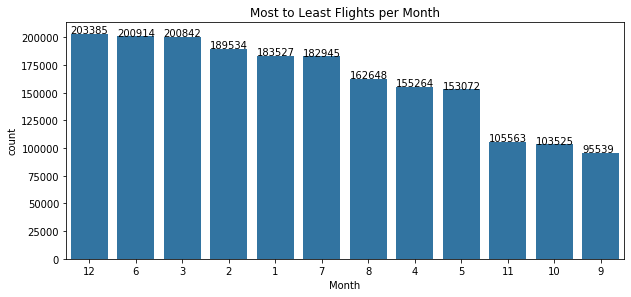

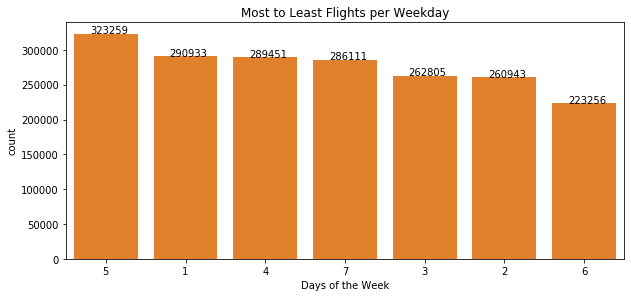

In [9]:
# Countplot of flights per month

# plt.figure(figsize = (10,20))
# plt.subplot(4, 1, 1)
# base_color = sb.color_palette()[0]
# sb.countplot(data = flights, x = 'Month', color = base_color)
# plt.title('Flights per Month');

# Countplot of flights per month in descending order

plt.figure(figsize = (10,20))
plt.subplot(4, 1, 2)
base_color = sb.color_palette()[0]
month_order = flights['Month'].value_counts().index
ax = sb.countplot(data = flights, x = 'Month', color = base_color, order = month_order)
plt.title('Most to Least Flights per Month')

#annotate bars 

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+300));

# Counplot of how many flights per day of week

# plt.figure(figsize = (10,20))
# plt.subplot(4, 1, 3)
# color = sb.color_palette()[1]
# sb.countplot(data = flights, x = 'DayOfWeek', color = color)
# plt.title('Flights per Weekday')
# plt.xlabel('Days of the Week');

# Flights per day of week in descending order 
plt.figure(figsize = (10,20))
plt.subplot(4, 1, 4)
color = sb.color_palette()[1]
day_order = flights['DayOfWeek'].value_counts().index
ax = sb.countplot(data = flights, x = 'DayOfWeek', color = color, order = day_order)
plt.title('Most to Least Flights per Weekday')
plt.xlabel('Days of the Week')

# annotate bars
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+200));

## Distribution of Arrival Delays

The following is a histogram of arrival delays in minutes which shows a right skewed plot with most arrival delays landing between 0-25 minutes.

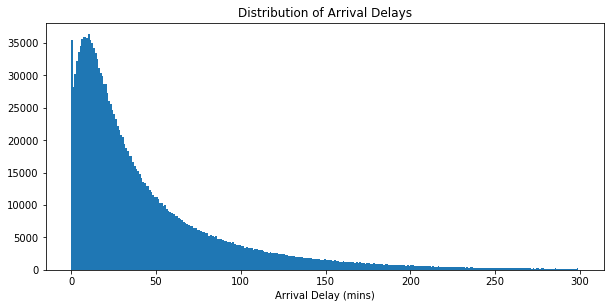

In [11]:
plt.figure(figsize = (10,10))
plt.subplot(2, 1, 2)
bins = np.arange(0, 300, 1)
plt.hist(data = flights, x = 'ArrDelay', bins = bins)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (mins)');

## Delay Types per Month

The following plot shows the occurance of delay types per month.

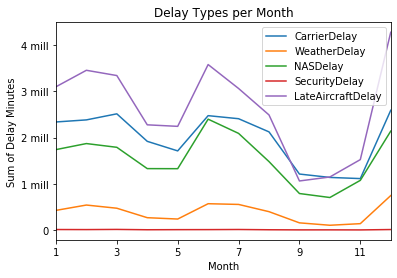

In [12]:
# Filter out the month and delay columns into a new data frame

flights_delay = flights.filter(['Month', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis = 1)

# Groupby month and get sums of delays, plot

flights_delay = flights_delay.groupby('Month')['Month', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
                                               'SecurityDelay', 'LateAircraftDelay'].sum().plot()
flights_delay.legend(loc = 0)
flights_delay.set_title('Delay Types per Month')
flights_delay.set_xlabel('Month')
flights_delay.set_ylabel('Sum of Delay Minutes')
yticks = [0, 1000000, 2000000, 3000000, 4000000]
flights_delay.set_yticks(yticks)
yticklabels = ['0', '1 mill', '2 mill', '3 mill', '4 mill']
flights_delay.set_yticklabels(yticklabels)
plt.show();

## Delays Related to Airline Carrier

The following two plots are barplots that show each unique airline carrier (x-axis) and the mean of carrier delays and late aircraft delays in minutes. These two types of delays are related to the airline carrier.

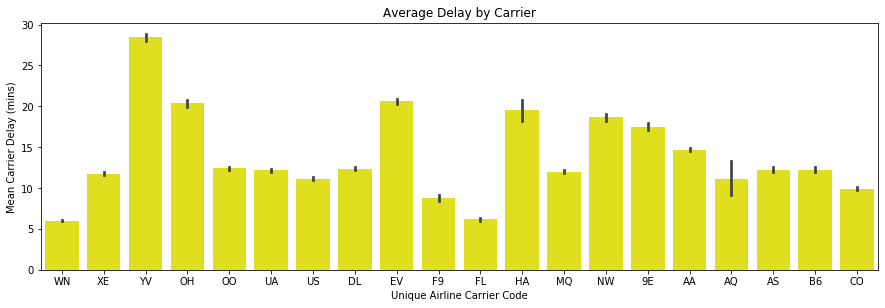

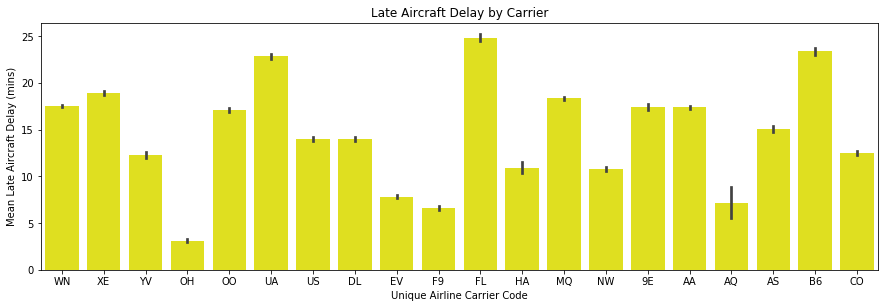

In [13]:
# Carrier Delay and Unique Carrier barplot

plt.figure(figsize = (15, 10))
plt.subplot(2, 1, 1)
sb.barplot(data = flights, x = 'UniqueCarrier', y = 'CarrierDelay', color = 'yellow')
plt.title('Average Delay by Carrier')
plt.xlabel('Unique Airline Carrier Code')
plt.ylabel('Mean Carrier Delay (mins)');

# Late Aircraft Delay and Unique Carrier barplot

plt.figure(figsize = (15, 10))
plt.subplot(2, 1, 2)
sb.barplot(data = flights, x = 'UniqueCarrier', y = 'LateAircraftDelay', color = 'yellow')
plt.title('Late Aircraft Delay by Carrier')
plt.xlabel('Unique Airline Carrier Code')
plt.ylabel('Mean Late Aircraft Delay (mins)');

## Correlation Heat Map

The heat map is a correlated map of distance, arrival delays, carrier delays, weather delays, NAS delays, security delays, late aircraft delays and actual elapsed time, which are most of the numeric valued columns in our dataset to assess.

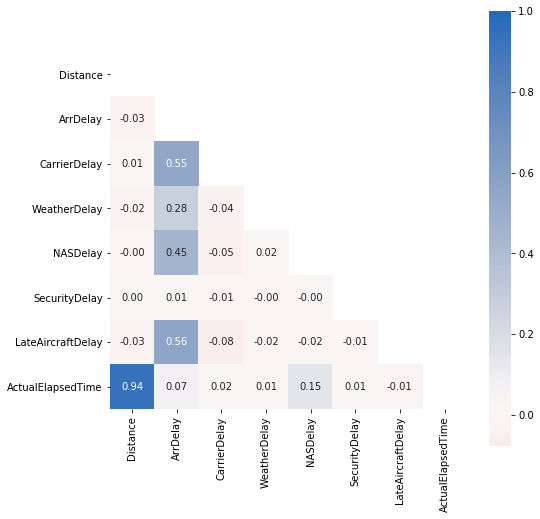

In [14]:
corr_col = ['Distance', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
            'SecurityDelay', 'LateAircraftDelay', 'ActualElapsedTime' ]

corr = flights[corr_col].corr()

plt.figure(figsize = (8,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True      #masking the upper half of triangle to cut redundancy
sb.heatmap(corr, annot = True, fmt = '0.2f', cmap = 'vlag_r', 
           center = 0, square = True, mask = mask)
plt.ylim(len(corr), -0.1);

## Type of Delay Effect on Arrival and Departure Delays

The following 4 images are of scatter plots of NAS delay, carrier delay, weather delay and late aircraft delay all plotted against a arrival vs. departure delay graph.

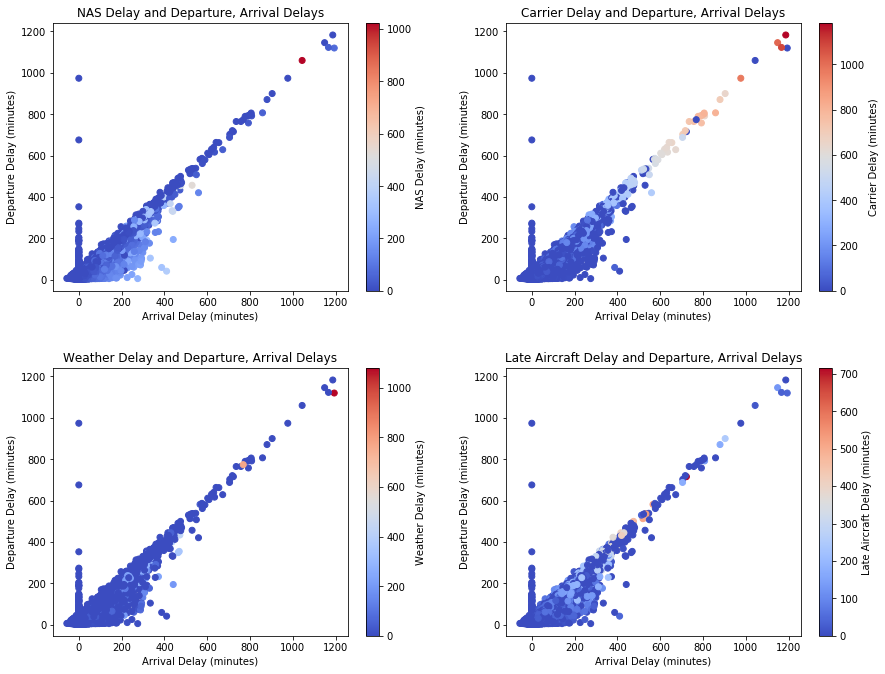

In [15]:
# Using sample of 50,000 to render a plot faster

sample2 = np.random.choice(flights.shape[0], 50000, replace = False)
samp = flights.loc[sample2,:]

plt.figure(figsize = (13, 10))

# NAS Delay

plt.subplot(2,2,1)
plt.scatter(data = samp, c = 'NASDelay', x = 'ArrDelay', y = 'DepDelay', cmap = 'coolwarm')
plt.colorbar(label = 'NAS Delay (minutes)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Departure Delay (minutes)')
plt.title('NAS Delay and Departure, Arrival Delays');

# Carrier Delay

plt.subplot(2,2,2)
plt.scatter(data = samp, c = 'CarrierDelay', x = 'ArrDelay', y = 'DepDelay', cmap = 'coolwarm')
plt.colorbar(label = 'Carrier Delay (minutes)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Departure Delay (minutes)')
plt.title('Carrier Delay and Departure, Arrival Delays');

# Weather Delay

plt.subplot(2,2,3)
plt.scatter(data = samp, c = 'WeatherDelay', x = 'ArrDelay', y = 'DepDelay', cmap = 'coolwarm')
plt.colorbar(label = 'Weather Delay (minutes)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Departure Delay (minutes)')
plt.title('Weather Delay and Departure, Arrival Delays');

# Late Aircraft Delay

plt.subplot(2,2,4)
plt.scatter(data = samp, c = 'LateAircraftDelay', x = 'ArrDelay', y = 'DepDelay', cmap = 'coolwarm')
plt.colorbar(label = 'Late Aircraft Delay (minutes)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Departure Delay (minutes)')
plt.title('Late Aircraft Delay and Departure, Arrival Delays');

plt.tight_layout(pad = 3)